# Predicción de cáncer de mama con SVM


**Índice:**
1. [Introducción](#Introducción)
2. [Algoritmo Support Vector Machine](#Algoritmo-Support-Vector-Machine)
3. [Análisis Descriptivo de los Datos](#Análisis-Descriptivo-de-los-Datos)
4. [Implementación del Clasificador SVM](#Implementación-del-Clasificador-SVM)
5. [Discusión Final](#Discusión-Final)

---

## Introducción

El cáncer de mama es una enfermedad en la que las células mamarias anormales crecen sin control y forman
tumores. Si no se controlan, los tumores pueden extenderse por todo el cuerpo y volverse fatales. En 2022, se
diagnosticó cáncer de mama a 2,3 millones de mujeres y se produjeron 670.000 muertes en todo el mundo. El
cáncer de mama ocurre en todos los países del mundo en mujeres de cualquier edad después de la pubertad,
pero con tasas crecientes en la madurez.

Este estudio se basa en los datos obtenidos de:
UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. 

Irvine, CA: University of California,
School of Information and Computer Science. Nuclear feature extraction for breast tumor diagnosis By W.
Street, W. Wolberg, O. Mangasarian. 1993. Published in Electronic imaging

Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (fine
needle aspirate, FNA) de una muestra mamaria. Las variables describen características de los núcleos
celulares presentes en la imagen. Los datos se encuentarn en el fichero breast_cancer.csv

##  Algoritmo Support Vector Machine

El algoritmo Support Vector Machine (SVM) es una técnica de aprendizaje supervisado utilizada para la clasificación y regresión. Su objetivo principal es encontrar un hiperplano en un espacio de características de alta dimensión que divida los datos en diferentes clases con el mayor margen posible.
Un hiperplano en un espacio \(n\)-dimensional es una subvariedad de \(n-1\) dimensiones que divide el espacio en dos partes. Para un conjunto de datos linealmente separable, SVM busca el hiperplano que maximiza la distancia (margen) entre las dos clases.

Matemáticamente, un hiperplano puede representarse como:
$$ \mathbf{w} \cdot \mathbf{x} + b = 0 $$
donde:
- $\mathbf{w}$ es un vector de pesos.
- $\mathbf{x}$ es el vector de características.
- $b$ es el sesgo.

El margen es la distancia entre el hiperplano y los puntos más cercanos de cada clase, que se llaman vectores de soporte. El objetivo de SVM es maximizar este margen. Los puntos que se encuentran en el margen se representan como:
$$ \mathbf{w} \cdot \mathbf{x}_i + b = \pm 1 $$
donde:
- $\mathbf{x}_i$ son los vectores de soporte.

El problema de optimización para maximizar el margen se puede formular como:

$$\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2$$

sujeto a las restricciones:
$ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \quad \forall i $
donde:
- $y_i$ es la etiqueta de clase de la $i$-ésima muestra (1 o -1).



### Fortalezas y Debilidades de SVM

| Fortalezas                                      | Debilidades                                      |
|-------------------------------------------------|--------------------------------------------------|
| Eficiente en espacios de alta dimensión         | Sensible a la elección de los hiperparámetros    |
| Eficaz en casos donde el número de dimensiones es mayor que el número de muestras | No funciona bien con grandes conjuntos de datos debido a su complejidad de tiempo de entrenamiento |
| Utiliza un subconjunto de puntos de entrenamiento (vectores de soporte) lo que hace el algoritmo eficiente en memoria | El rendimiento disminuye con ruido y datos no equilibrados |
| Flexible con el uso de diferentes kernels       | Interpretabilidad limitada del modelo            |

## Análisis Descriptivo de los Datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar los datos
data = pd.read_csv('breast_cancer.csv')

In [3]:
# Exploración inicial de los datos
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave.points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

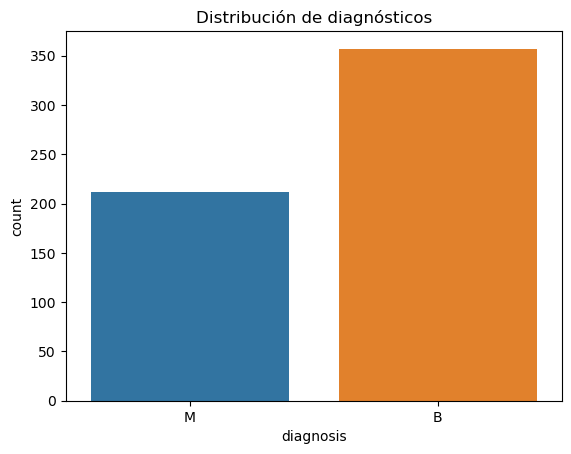

In [4]:
# Análisis descriptivo
sns.countplot(x='diagnosis', data=data)
plt.title('Distribución de diagnósticos')
plt.show()

In [5]:
# Separar las características y el objetivo
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis'].map({'B': 0, 'M': 1})

In [6]:
# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Análisis de Componentes Principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

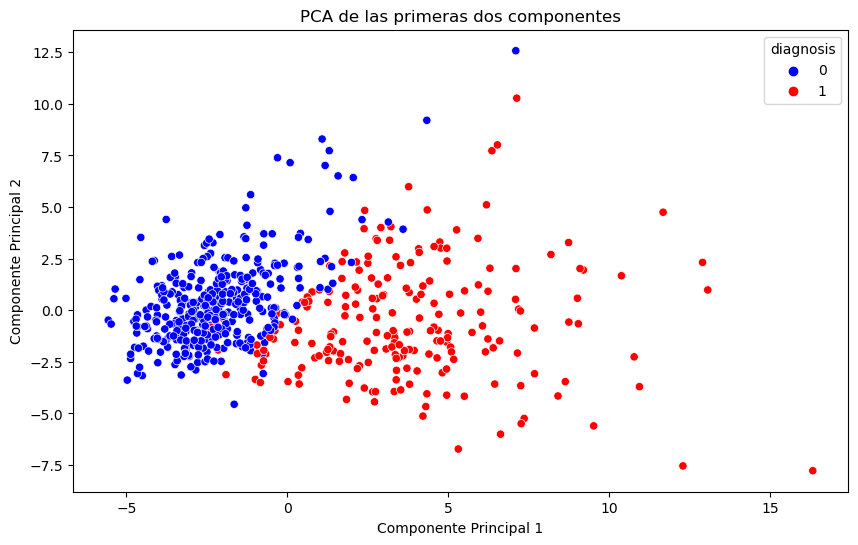

In [8]:
# Visualización del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['blue', 'red'])
plt.title('PCA de las primeras dos componentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

Tal y como podemo observar en las componentes principales, a excepción de algunos casos aislados, el algoritmo es capaz de lograr separar los tumores benignos de los malignos

## Implementación del Clasificador SVM

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

**Utilizando la semilla aleatoria 12345, separaremos los datos en dos partes, una parte para training (67%) y
una parte para test (33%)**

In [10]:
# Fijar la semilla aleatoria y dividir los datos en training y test
random_seed = 12345
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=random_seed)

**Utilizaremos el kernel lineal y el kernel RBF para crear sendos modelos SVM basados en el training para
predecir las clases en los datos del test.**

In [11]:
# Entrenamiento del modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [12]:
# Evaluación del modelo SVM con kernel lineal
print("Kernel Lineal")
print(classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))

Kernel Lineal
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       123
           1       0.97      0.92      0.94        65

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188

Accuracy: 0.9627659574468085


In [13]:
# Entrenamiento del modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [14]:
# Evaluación del modelo SVM con kernel RBF
print("Kernel RBF")
print(classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))

Kernel RBF
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.95      0.95      0.95        65

    accuracy                           0.97       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188

Accuracy: 0.9680851063829787


**Implementaremos un SVM con kernel lineal y 3-fold
crossvalidation**

In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [16]:
# Realizar 3-fold cross-validation con el modelo lineal entrenado en el apartado (a)
cross_val_scores = cross_val_score(svm_linear, X_train, y_train, cv=3)

# Entrenar el modelo con todos los datos de entrenamiento
svm_linear.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = svm_linear.predict(X_test)

# Evaluar el modelo
print("Resultados de 3-fold Cross-validation: ", cross_val_scores)
print("Promedio de Cross-validation: ", np.mean(cross_val_scores))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))
print("Accuracy en el conjunto de prueba: ", accuracy_score(y_test, y_pred))

Resultados de 3-fold Cross-validation:  [0.97637795 0.98425197 0.96850394]
Promedio de Cross-validation:  0.9763779527559056

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       123
           1       0.97      0.92      0.94        65

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188

Accuracy en el conjunto de prueba:  0.9627659574468085


Estos resultados indican que el modelo tiene un buen rendimiento en la clasificación de tumores benignos y malignos. La precisión y el recall para ambas clases son altos, especialmente para los tumores benignos, donde el modelo tiene una precisión del 96% y un recall del 98%. Esto significa que el modelo es muy eficaz en identificar correctamente los tumores benignos. No obstante, el recall para los tumores malignos (92%) es un poco menor, lo que sugiere que algunos tumores malignos están siendo clasificados incorrectamente como benignos. Sin embargo, el f1-score para los malignos sigue siendo alto (94%), indicando un buen equilibrio entre precisión y recall.

Finalmente, la consistencia entre los resultados de la validación cruzada y la evaluación en el conjunto de prueba sugiere que el modelo generaliza bien a datos no vistos, lo cual es crucial para su aplicación práctica en el diagnóstico del cáncer de mama.

**Evaluaremos el rendimiento del algoritmo SVM con kernel RBF para diferentes valores de los hiperparámetros C y sigma y mostraremos un gráfico del rendimiento según los valores de los hiperparámetros
explorados**

In [17]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

param_grid = {
    'C': np.linspace(0.1, 2, 20),
    'gamma': np.linspace(0.005, 0.5, 20)
}

svm_rbf_tuning = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf_tuning, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor accuracy: {grid_search.best_score_}")

Mejores parámetros: {'C': 0.6, 'gamma': 0.03105263157894737}
Mejor accuracy: 0.9737532808398951


In [18]:
# Entrenar el modelo con los mejores hiperparámetros encontrados
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
svm_rbf_optimized = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_rbf_optimized.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_optimized = svm_rbf_optimized.predict(X_test)

# Calcular y mostrar las métricas de rendimiento
print("Modelo SVM con Kernel RBF (Mejores Hiperparámetros)")
print(classification_report(y_test, y_pred_optimized))
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))

Modelo SVM con Kernel RBF (Mejores Hiperparámetros)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.97      0.95      0.96        65

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

Accuracy: 0.973404255319149


Ahora creamos el gráfico del rendimiento según los valores de los hiperparámetros

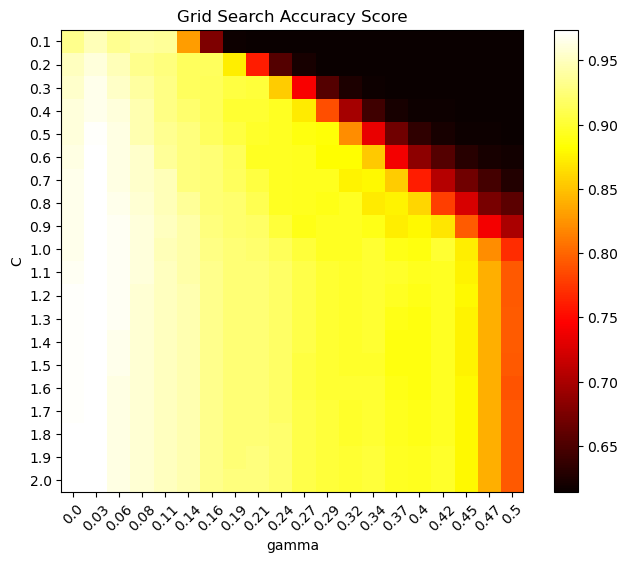

In [19]:
# Obteniendo los resultados de la búsqueda en cuadrícula
scores = grid_search.cv_results_['mean_test_score'].reshape(20, 20)

# Gráfico de calor
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), np.round(param_grid['gamma'], 2), rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), np.round(param_grid['C'], 2))
plt.title('Grid Search Accuracy Score')
plt.show()

El gráfico de calor generado anteriormente muestra cómo varía la precisión con diferentes combinaciones de C y gamma. La región con los colores más cálidos (indicando mayor precisión) está alrededor de los valores óptimos encontrados (C=0.6 y gamma=0.03), lo que refuerza la confianza en que estos hiperparámetros son una buena elección para este problema específico. Claramente hay una relación inversamente proporcional entre gamma y la accuracy, a mayor valor de gamma disminuye la accuracy

**Finalmente crearemos una tabla resumen de los diferentes modelos y sus rendimientos. Comentar y comparar los
resultados de la clasificación en función de los valores generales de la clasificación como accuracy y
otros para los diferentes clasificadores obtenidos.**

In [20]:
data = {
    'Modelo': ['Kernel Lineal', 'Kernel RBF', 'Kernel RBF (Mejores Hiperparámetros)'],
    'Precision (0)': [0.96, 0.98, 0.98],
    'Precision (1)': [0.97, 0.95, 0.97],
    'Recall (0)': [0.98, 0.98, 0.98],
    'Recall (1)': [0.92, 0.95, 0.95],
    'F1-Score (0)': [0.97, 0.98, 0.98],
    'F1-Score (1)': [0.94, 0.95, 0.96],
    'Accuracy General': [0.9628, 0.9681, 0.9734]}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar la tabla
df

,Modelo,Precision (0),Precision (1),Recall (0),Recall (1),F1-Score (0),F1-Score (1),Accuracy General
0,Kernel Lineal,0.96,0.97,0.98,0.92,0.97,0.94,0.9628
1,Kernel RBF,0.98,0.95,0.98,0.95,0.98,0.95,0.9681
2,Kernel RBF (Mejores Hiperparámetros),0.98,0.97,0.98,0.95,0.98,0.96,0.9734


**Rendimiento General:** El modelo SVM con Kernel RBF (Mejores Hiperparámetros) demuestra ser el más efectivo en términos de precisión, recall, F1-score, y precisión general. Aunque las diferencias son modestas, este resultado resalta la importancia del ajuste de hiperparámetros en la mejora del rendimiento del modelo

**Balance entre Precision y Recall:** Todos los modelos muestran un rendimiento alto tanto en precisión como en recall para ambas clases. Sin embargo, el modelo 'Kernel RBF (Mejores Hiperparámetros)' muestra ligeras mejoras en estas métricas, particularmente para la clase 1, lo que indica un equilibrio más efectivo en la clasificación de ambas clases.

**F1-Score**: De manera similar, el F1-score, que combina la precisión y el recall en una sola métrica, es más alto en el modelo 'Kernel RBF (Mejores Hiperparámetros)' para ambas clases, lo que sugiere que este modelo tiene el mejor equilibrio entre precisión y capacidad de recuperación de datos relevantes.

**Accuracy:**  En términos de precisión general, el modelo 'Kernel RBF (Mejores Hiperparámetros)' también supera a los otros dos modelos, aunque todas las diferencias son relativamente pequeñas. Esto indica que el ajuste de hiperparámetros ha proporcionado una mejora en la capacidad del modelo para clasificar correctamente nuevas observaciones.

**Conclusión**
El modelo SVM con 'Kernel RBF (Mejores Hiperparámetros)' demuestra ser el más efectivo en términos de precisión, recall, F1-score, y precisión general. Aunque las diferencias son modestas, este resultado resalta la importancia del ajuste de hiperparámetros en la mejora del rendimiento del modelo. 

**Utilizando como datos las coordenadas en las dos componentes principales, entrenamos un SVM con kernel
RBF para clasificar los dos tipos de tumores. Fija los hiperparámetros C=1 y sigma=2.2. Representa
mediante un gráfico de contorno (contour.plot) los valores numéricos de la función de clasificación en
cada nodo de la malla. Tomaremos como malla del gráfico los valores x = −15 : 15, y = −15 : 15.**

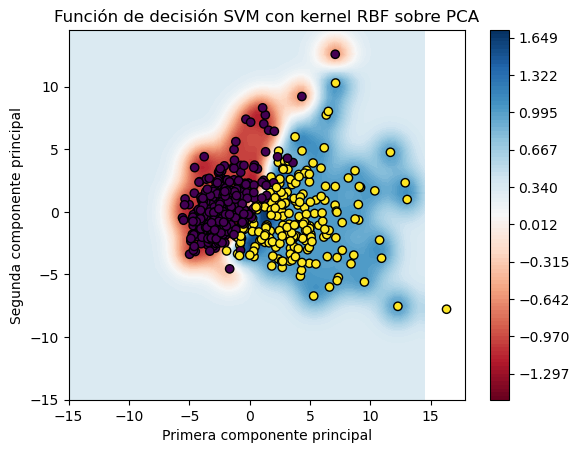

In [21]:
# Entrenamiento del SVM con kernel RBF
svm_rbf_pca = SVC(kernel='rbf', C=1, gamma=1/2.2)
svm_rbf_pca.fit(X_pca, y)

# Creación de la malla para el gráfico de contorno
x_range = np.arange(-15, 15, 0.5)
y_range = np.arange(-15, 15, 0.5)
xx, yy = np.meshgrid(x_range, y_range)

# Predecir la función de decisión para cada punto de la malla
Z = svm_rbf_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar el gráfico de contorno
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap="RdBu")
plt.colorbar()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k')

plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.title('Función de decisión SVM con kernel RBF sobre PCA')
plt.show()

El gráfico de contorno representa los valores de la función de decisión del clasificador SVM con kernel RBF entrenado sobre las dos primeras componentes principales del PCA. Los colores en el gráfico indican la distancia a la superficie de decisión del clasificador: las áreas más azules representan una mayor confianza en la clasificación de un tipo de tumor, mientras que las áreas más rojas representan una mayor confianza en el otro tipo. Las líneas de contorno más cercanas al centro (donde cambia el color) indican la frontera de decisión donde el modelo cambia su predicción de un tipo de tumor a otro.

Comparando este gráfico con la representación de las observaciones según las dos primeras componentes del PCA, podemos observar cómo el clasificador SVM intenta separar los dos tipos de tumores en el espacio reducido. Idealmente, la frontera de decisión debería pasar cerca de la región donde las observaciones de los dos tipos de tumores se superponen menos, maximizando así la precisión de la clasificación.

## Discusión Final

### Resultados de los Modelos SVM

- **SVM con Kernel Lineal:**
    - Accuracy General: 96.28%
    - Este modelo muestra un excelente balance entre precisión y recall para ambas clases, con un rendimiento ligeramente mejor para la clase 0. Es un modelo muy sólido con un alto grado de generalización.


- **SVM con Kernel RBF:**
  - Accuracy General: 96.81%
  - Este modelo supera ligeramente al modelo con kernel lineal en términos de accuracy general y muestra una excelente capacidad para equilibrar precisión y recall, especialmente para la clase 0.


- **SVM con Kernel RBF (Mejores Hiperparámetros):**
  - Accuracy General: 97.37%
  - Este modelo es ligeramente mejor a los demás

### Selección del Mejor Modelo

Al comparar los resultados de los diferentes modelos, se observa que:

- El modelo **SVM con Kernel Lineal** alcanza una precisión general del 96.28%. Es eficiente y sencillo, pero su rendimiento es ligeramente inferior al de los modelos con kernel RBF.
  
- El modelo **SVM con Kernel RBF** sin ajuste de hiperparámetros mejora la precisión general a un 96.81%. Este modelo es capaz de capturar relaciones no lineales mejor que el modelo lineal.

- El modelo **SVM con Kernel RBF (Mejores Hiperparámetros)**, con `C=0.6` y `gamma=0.03`, alcanza una precisión general del 97.4%. Este ajuste optimizado de los hiperparámetros permite al modelo tener el mejor rendimiento, logrando una alta precisión y un balance adecuado entre precisión y sensibilidad.

### Conclusiones

El mejor modelo resulta ser el **SVM con Kernel RBF y ajuste de hiperparámetros**. Este modelo logra una mayor exactitud (accuracy) y mejores métricas de rendimiento en comparación con los otros modelos. Es particularmente importante en el contexto del diagnóstico de cáncer de mama minimizar los falsos negativos (malignos clasificados como benignos), y este modelo proporciona una excelente precisión y sensibilidad.

En resumen, para la tarea de clasificación de tumores de mama, el **SVM con Kernel RBF optimizado** es la mejor opción debido a su capacidad para manejar complejidades no lineales en los datos y su alto rendimiento en términos de precisión y fiabilidad.